# TITANIC

### RESUMEN

### Importamos librerias

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Cargamos el Dataset

In [3]:
# Leemos el dataset y lo convertimos en un dataframe
df = pd.read_csv('titanic.csv')

In [4]:
# Imprimimos el dataset
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Vemos el número de nulos en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que en la columna 'Age' hay pocos valores nulos por lo que se puede reparar, mientras que en 
la columna 'Cabin' hay bastantes más por lo que procederemos a eliminarla. Asimismo en la columna 'Embarked' hay solamente 2, por lo que procederemos a rellenar esos datos tambien.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
media = df['Age'].mean() # Calculamos la media de la columna
print(media)

29.69911764705882


In [12]:
df['Age'].fillna(media, inplace= True) # Rellenamos la columna Age con la media ya que es de tipo Float

In [26]:
moda = df['Embarked'].mode().values[0] # Calculamos la moda de la columna

In [27]:
df['Embarked'].fillna(moda, inplace= True) # Rellenamos la columna Embarked con la moda ya que es de tipo object

In [29]:
df.isnull().sum() # Comprobamos que no hay valores nulos en las columnas reparadas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
df.drop('Cabin', axis=1, inplace=True) # Eliminamos la columna 'Cabin'

In [32]:
df.info() # Comprobamos que ya no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Una vez reparado el dataset, vemos que tipos de columnas tenemos y como podemos jugar con ellas

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Significado de cada columna
PassengerId -> Muestra el id del Pasajero (solamente es un indicador.) //
Survived -> Se encuentra en 2 valores 0 si murió en la trajedia y 1 si sobrevivió // 
Pclass -> Determina la clase del pasajero, 1ra, 2da o 3era clase. // 
Name -> Nombre de los Pasajeros // 
Sex -> Sexo de los Pasajeros // 
Age -> Edad de los Pasajeros //
SibSp -> Número de parientes como Hermano, Hermana, Hermanastra, Hermanastro, Esposo o Esposa. // 
Parch -> Número de parientes como Madre, Padre, Hijo, Hija, Hijastro, Hijastra // 
Ticket -> Número del ticket o boleto. // 
Fare -> Tarifa del pasaje. // 
Cabin -> Número de cabina del pasajero. // 
Embarked -> Muestra los datos del puerto de embarcadero. (C = Cherbourg, Q = Queenston, S = Southapmtpon)

Fuente: ''Rafael Pacheco Algalan y Adrian Homero Moreno''

### Preguntas interesantes sobre el Dataset

- ¿Cuantas personas han sobrevivido?
- ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?
- ¿Había más mujeres o más hombre?
- ¿Cual es el % de mujeres que sobrevivieron, y de hombres?
- Relacion entre la clase del pasajero y si sobrevivieron o no
- Relación entre la edad y si sobrevivieron o no
- ¿Cuales fueron los 10 billetes más caros?
- Relacion entre el precio y el puerto de embarcadero
- ¿Había muchas familias?


#### ¿Cuantas personas han sobrevivido?

In [44]:
df['Survived'].value_counts() # Donde el 1 es que sobrevivieron, se ve que menos de la mitad sobrevivieron al accidente

Survived
0    549
1    342
Name: count, dtype: int64

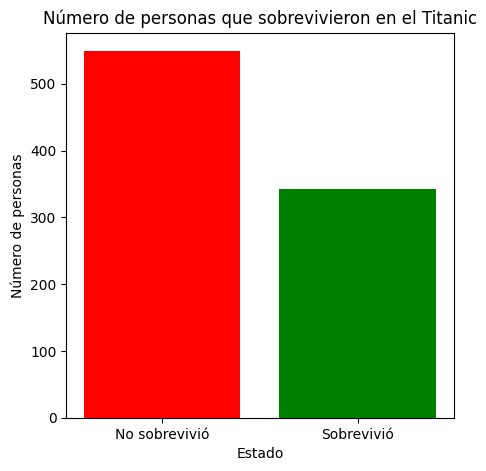

In [57]:
# Crear un gráfico de barras para reflejarlo de maneras más fácil y visual
supervivientes = df['Survived'].value_counts()
supervivientes_columnas = ['No sobrevivió', 'Sobrevivió']

plt.figure(figsize=(5, 5)) # Tamaño uniforme
plt.bar(supervivientes_columnas, supervivientes, color=['red', 'green']) # Colores caracteristicos
plt.title('Número de personas que sobrevivieron en el Titanic')
plt.xlabel('Estado')
plt.ylabel('Número de personas')

plt.show()


#### ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?